In [152]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.display import Latex

# 1.1 Vectors

The simplest data structure representing a vector: `list`

In [2]:
x = [-1.1, 0.0, 3.6, -7.2]
len(x)

4

Here `y` is a `tuple` consisting of two scalars. It is neither a `list` nor a `vector`.

In [3]:
 y = (1, 2) 

Another common way to represent vectors in Python is to use a `numpy array`

In [4]:
x = np.array([-1.1, 0.0, 3.6, -7.2])
len(x)

4

## Indexing

In [5]:
x = np.array([-1.1, 0.0, 3.6, -7.2])
print('vector "x":', x)

vector "x": [-1.1  0.   3.6 -7.2]


*0-based* indexing

In [6]:
x[0]

-1.1

Assign 4 to $x_3$

In [7]:
x[2] = 4
print('vector "x":', x)

vector "x": [-1.1  0.   4.  -7.2]


The negative integer index is counted from the end of the vector

In [8]:
x[-1] == x[3]  # x_4

True

In [9]:
x[-2] == x[2]  # x_3

True

## Assignment versus copying

```python
y = x
```
The assignment expression gives a new name (or reference) y to the same array that is already referenced
by x instead of creating a copy of x.

The behavior in Python is same as Julia, different from MatLab / Octave

In [10]:
x = np.array([-1.1, 0.0, 3.6, -7.2])
y = x
x[2] = 20.0
print(y)

[-1.1  0.  20.  -7.2]


Use the method `copy` to get a copy of the array

In [11]:
x = np.array([-1.1, 0.0, 3.6, -7.2])
y = x.copy()
x[2] = 20.0
print(y)

[-1.1  0.   3.6 -7.2]


## Vector equality

Equality of vectors is checked using the relational operator `==` (double equal signs).

The Python expression evaluates to `True` if the expression on the left and right-hand side of the relational operator is equal, and to `False` otherwise

List:

In [12]:
x = [-1.1, 0.0, 3.6, -7.2]
y = x.copy()
x == y

True

In [13]:
x = [-1.1, 0.0, 3.6, -7.2]
y = x.copy()
y[3] = 9.0
x == y

False

numpy array:

In [14]:
x = np.array([-1.1, 0.0, 3.6, -7.2])
y = x.copy()
print('element-wise comparison:', x == y)  # x == y is equal to np.equal(x, y)
print('vector comparison:', np.array_equal(x, y))

element-wise comparison: [ True  True  True  True]
vector comparison: True


In [15]:
x = np.array([-1.1, 0.0, 3.6, -7.2])
y = x.copy()
y[3] = 9.0
print('element-wise comparison:', x == y)  # x == y is equal to np.equal(x, y)
print('vector comparison:', np.array_equal(x, y))

element-wise comparison: [ True  True  True False]
vector comparison: False


## Scalars versus 1-vectors

list:

In [16]:
x = 2.4  # x type is float
y = [2.4]  # y type is list
print('x:', x)
print('y:', y)
print('x == y:', x == y)  # The output type is bool
print('x == y[0]:', x == y[0]) # The output type is bool
print('type(x) == type(y):', type(x) == type(y)) # The output type is bool

x: 2.4
y: [2.4]
x == y: False
x == y[0]: True
type(x) == type(y): False


numpy array:

In [17]:
x = 2.4  # x type is float
y = np.array([2.4])  # y type is numpy.ndarray
print('x:', x)
print('y:', y)
print('x == y:', x == y)  # The output type is numpy.ndarray
print('x == y[0]:', x == y[0]) # The output type is numpy.bool_
print('type(x) == type(y):', type(x) == type(y)) # The output type is bool

x: 2.4
y: [2.4]
x == y: [ True]
x == y[0]: True
type(x) == type(y): False


## Block and stacked vectors

In Python, we can construct a block vector using the
numpy function [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)
(For other methods of stacking numpy.ndarray, see the "See Also" section).

In [18]:
x = np.array([1, -2])  # shape is (2,)
y = np.array([1, 1, 0])  # shape is (3,)
z = np.concatenate((x,y)) # shape is (5,)
print('z:', z)
print('z.shape:', z.shape)

z: [ 1 -2  1  1  0]
z.shape: (5,)


In [19]:
z = np.hstack((x, y))
print(z)
print('z.shape:', z.shape)

[ 1 -2  1  1  0]
z.shape: (5,)


## Subvectors and slicing

$x_{r:s}$ denotes the slice of the vector x from index r to s (Python is 0-based indexing)

For the expressing `x[a:b]` for array x, the slicing selects the element from index `a` to index `b-1`.

In [20]:
x = np.array([1,8,3,2,1,9,7])
y = x[1:4]   # [start:end] [inclusive:exclusive]
display(Latex('$x_{1:3}$ = %s' %y))

<IPython.core.display.Latex object>

use index ranges to assign a slice of a vector.

In [21]:
display(Latex('Before: $x$ = %s' %x))
x[3:6] = [100,200,300]  # reassigned index 3 to 5 in array x.
display(Latex('After: $x$ = %s' %x))
print('As a result, you can see the 4th, 5th and 6th elements in the array are reassigned.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

As a result, you can see the 4th, 5th and 6th elements in the array are reassigned.


use slicing to select all elements in the array starting from a certain index

In [22]:
x = np.array([1,8,3,2,1,9,7])
x[2:]  # [start:end]

array([3, 2, 1, 9, 7])

In [23]:
x[:-1]  # [start:end]

array([1, 8, 3, 2, 1, 9])

use a number range with a third argument ([start:end:step]), that gives the increment between successive indexes.

In [24]:
x[2:0:-1]

array([3, 8])

In [25]:
x[::-1]  # reverse vector

array([7, 9, 1, 2, 3, 8, 1])

## Vector of First Differences

Let’s use slicing to create the $(n−1)$-vector $d$ defined by $d_i = x_{i+1} − x_i$, for $i = 1, . . . , n − 1$, where $x$ is an n-vector. The vector $d$ is called the vector of (first) differences of $x$.

In [26]:
x = np.array([1,8,3,2,1,9,7])
d = x[1:] - x[:-1]  # alternative: np.array([x[i + 1] - x[i] for i in range(len(x) - 1)])
print(d)

[ 7 -5 -1 -1  8 -2]


## Lists of vectors

In [27]:
x = np.array([1, 0])
y = np.array([1, -1])
z = np.array([0, 1])
array_of_arrays = np.array([x, y, z])  # array of arrays (2d array)
print('array_of_arrays:', array_of_arrays)
print('array_of_arrays[1]:', array_of_arrays[1])  # Second element of array
print('array_of_arrays[1][0]:', array_of_arrays[1][0])  # First entry in second element of array

array_of_arrays: [[ 1  0]
 [ 1 -1]
 [ 0  1]]
array_of_arrays[1]: [ 1 -1]
array_of_arrays[1][0]: 1


In [28]:
x = np.array([1, 0])
y = np.array([1, -1])
z = np.array([0, 1])
list_of_arrays = [x, y, z]  # list of arrays
print('list_of_arrays:', list_of_arrays)
print('list_of_arrays[1]:', list_of_arrays[1])  # Second element of list
print('list_of_arrays[1][0]:', list_of_arrays[1][0])  # First entry in second element of list

list_of_arrays: [array([1, 0]), array([ 1, -1]), array([0, 1])]
list_of_arrays[1]: [ 1 -1]
list_of_arrays[1][0]: 1


In [29]:
x = [1, 0]
y = [1, -1]
z = [0, 1]
list_of_lists = [x, y, z]  # list of lists
print('list_of_lists:', list_of_lists)
print('list_of_lists[1]:', list_of_lists[1])  # Second element of list
print('list_of_lists[1][0]:', list_of_lists[1][0])  # First entry in second element of list

list_of_lists: [[1, 0], [1, -1], [0, 1]]
list_of_lists[1]: [1, -1]
list_of_lists[1][0]: 1


In [30]:
x = [1, 0]
y = [1, -1]
z = [0, 1]
tuple_of_lists = (x, y, z)  # tuple of lists
tuple_of_lists
print('tuple_of_lists:', tuple_of_lists)
print('tuple_of_lists[1]:', tuple_of_lists[1])  # Second element of tuple
print('tuple_of_lists[1][0]:', tuple_of_lists[1][0])  # First entry in second element of tuple

tuple_of_lists: ([1, 0], [1, -1], [0, 1])
tuple_of_lists[1]: [1, -1]
tuple_of_lists[1][0]: 1


Note that the difference between [x,y,z] (an array of arrays or a list of lists) and a
stacked vector of x, y, and z, obtained by concatenation.

## Zero vectors
A zero vector, denoted $\boldsymbol0$, is a vector of length 0, and thus has all components equal to zero. It is the additive identity of the additive group of vectors.
https://mathworld.wolfram.com/ZeroVector.html

In [31]:
np.zeros(3)  # Return a new array of given shape and type, filled with zeros.

array([0., 0., 0.])

## Unit vectors
A unit vector is a vector of length 1, sometimes also called a direction vector (Jeffreys and Jeffreys 1988).

The unit vector $\mathbf{\hat{v}}$ having the same direction as a given (nonzero) vector $\mathbf{v}$ is defined by $\mathbf{\hat{v}} = \frac{\mathbf{v}}{\rvert\mathbf{v}\lvert}$, where $\rvert\mathbf{v}\lvert$ denotes the norm of $\mathbf{v}$, is the unit vector in the same direction as the (finite) vector $\mathbf{v}$.

https://mathworld.wolfram.com/UnitVector.html

In [32]:
i = 1
n = 3
ei = np.zeros(n)
ei[i] = 1
ei = ei / np.linalg.norm(ei)
print('ei:', ei)
print('norm of ei:', np.linalg.norm(ei))

ei: [0. 1. 0.]
norm of ei: 1.0


In [33]:
ei = np.zeros(n)
ei[0] = 3
ei[1] = 4
ei[2] = 2
ei = ei / np.linalg.norm(ei)
print('ei:', ei)
print('norm of ei:', np.linalg.norm(ei))

ei: [0.55708601 0.74278135 0.37139068]
norm of ei: 1.0


## Ones vectors


In [34]:
np.ones(3)  # Return a new array of given shape and type, filled with ones.

array([1., 1., 1.])

## Random vectors

"continuous uniform" distribution

In [35]:
n = 3
rng = np.random.default_rng()  # Construct a new Generator with the default BitGenerator (PCG64).
rng.random(3) # Return random floats in the half-open interval [0.0, 1.0).

array([0.59179736, 0.96178164, 0.34717873])

normal (Gaussian) distribution

In [36]:
rng.normal(loc=0.0, scale=1.0, size=n)  # Draw random samples from a normal (Gaussian) distribution.

array([-0.7535617 ,  1.462487  ,  0.60577576])

## Plotting

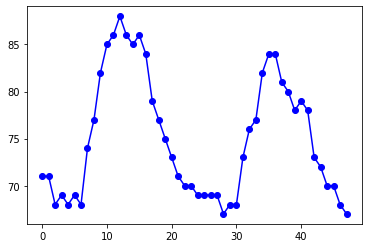

In [37]:
plt.ion()
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86, 88, 86,
85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69, 67,
68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72,
70, 70, 68, 67 ]
plt.plot(temps, '-bo')
# plt.savefig('temperature.pdf', format = 'pdf')
plt.show()

# 1.2. Vector addition

## Vector addition and subtraction
If x and y are numpy arrays of the same size, x+y and x-y give their sum and difference, respectively.

In [38]:
x = np.array([1, 2, 3])
y = np.array([100,200,300])
print('Sum of arrays:', x + y)
print('Difference of arrays:', x - y)

Sum of arrays: [101 202 303]
Difference of arrays: [ -99 -198 -297]


# 1.3 Scalar-vector multiplication

## Scalar-vector multiplication and division

If $a$ is a number and $\mathbf{x}$ is a numpy array (vector), you can express the scalar-vector product either as $a*\mathbf{x}$ or $\mathbf{x}*a$

In [39]:
a = 0.4
x = np.array([1, 2, 3])
print('a * x == x * a:', a * x == x * a)
print('a * x:', a * x)

a * x == x * a: [ True  True  True]
a * x: [0.4 0.8 1.2]


scalar-vector division as $\mathbf{x}/a$

In [40]:
print('x / a:', x/a)

x / a: [2.5 5.  7.5]


## Scalar-vector addition

In Python, you can add a scalar $a$ and a numpy array (vector)
$\mathbf{x}$ using $\mathbf{x}+a$. This means that the scalar is added to each element of the vector. This
is, however, NOT a standard mathematical notation. In mathematical notations, we
should denote this as, e.g. $\mathbf{x} + a\mathbf{1}$, where $\mathbf{x}$ is an n-vector and $a$ is a scalar.

In [41]:
a = -1.4
x = np.array([1.1, -3.7, .3])
print('x + a:', x + a)

x + a: [-0.3 -5.1 -1.1]


In [42]:
a = 4
x = np.array([1, 0, 5])
print('a + x:', a + x)

a + x: [5 4 9]


## Elementwise operations

For numpy arrays of the same length x and y, the expressions x * y, x / y and
x ** y give the resulting vectors of the same length as x and y and ith element $x_iy_i$, $\frac{x_i}{y_i}$, and $x_{i}^{yi}$
respectively

In [43]:
p_initial = np.array([22.15, 89.32, 56.77])
p_final = np.array([23.05, 87.32, 53.13])
r = (p_final - p_initial) / p_initial
r

array([ 0.04063205, -0.0223914 , -0.06411837])

## Elementwise operations with a scalar

In [44]:
w = [1, 2, 2]
z = [1, 2, 3]
print('list w:', w)
print('list z:', z)
print('w == z:', w == z)
print('np.array(w) == np.array(z):', np.array(w) == np.array(z))
print('np.array_equal(w,z):', np.array_equal(w,z))

list w: [1, 2, 2]
list z: [1, 2, 3]
w == z: False
np.array(w) == np.array(z): [ True  True False]
np.array_equal(w,z): False


In [45]:
x = np.array([1.1, .5, -1.5, -0.3])
x[np.abs(x) > 1]  # subvector of x consisting of the entries larger than one in magnitude.

array([ 1.1, -1.5])

In [46]:
rng = np.random.default_rng()
x = rng.normal(size=4)
print('type(x):', type(x))
print('x:', x)

type(x): <class 'numpy.ndarray'>
x: [-1.74508881  1.61953234 -0.38302913 -1.08578092]


In [47]:
x[0:2] = [-1,1]
print('type(x):', type(x))
print('x:', x)

type(x): <class 'numpy.ndarray'>
x: [-1.          1.         -0.38302913 -1.08578092]


In [48]:
x[1:3] = 1.3  # assign multiple entries of a vector to a scalar value
print('type(x):', type(x))
print('x:', x)

type(x): <class 'numpy.ndarray'>
x: [-1.          1.3         1.3        -1.08578092]


## Linear combination

A sum of the elements from some set with constant coefficients placed in front of each. For example, a linear combination of the vectors $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z}$ is given by $a\mathbf{x}+b\mathbf{y}+c\mathbf{z}$, where $a$, $b$, and $c$ are constants.

https://mathworld.wolfram.com/LinearCombination.html

In [49]:
a = np.array([1, 2])
b = np.array([3, 4])
alpha = -0.5
beta = 1.5
c = alpha*a + beta*b
c

array([4., 5.])

In [50]:
def linear_combination(coef, vectors):
    """Linear combination of vectors"""
    n = len(vectors[0])
    comb = np.zeros(n)
    for i in range(len(vectors)):
        comb = comb + coef[i] * vectors[i]
    return comb

linear_combination([alpha, beta], [a,b])

array([4., 5.])

In [51]:
def compact_linear_combination(coef, vectors):
    return sum(coef[i]*vectors[i] for i in range(len(vectors)))

compact_linear_combination([alpha, beta], (a,b))

array([4., 5.])

## Checking properties

Let’s check the distributive property:
$$\beta(a + b) = \beta a + \beta b$$

In [52]:
rng = np.random.default_rng()
a = rng.random(3)
b = rng.random(3)
beta = np.random.random()
lhs = beta * (a + b)
rhs = beta * a + beta * b
print('a :', a)
print('b :', b)
print('beta :', beta)
print('LHS :', lhs)
print('RHS :', rhs)
print('LHS == RHS :', lhs == rhs)

a : [0.71644571 0.29963852 0.25407025]
b : [0.7524274  0.73360239 0.0283098 ]
beta : 0.22433693454400006
LHS : [0.32952249 0.2317941  0.06334827]
RHS : [0.32952249 0.2317941  0.06334827]
LHS == RHS : [ True False  True]


Although the two vectors **lhs** and **rhs** are displayed as the same, they might not be
exactly the same, due to very small round-off errors in floating point computations.
When we check an identity using random numbers, we can expect that the left-hand
and right-hand sides of the identity are not exactly the same, but very close to each
other.

# 1.4 Inner product

## Inner product
The inner product of n-vectors $x$ and $y$ is denoted as $x^\top y = \sum_{i=1}^{n}x_iy_i$.

https://en.wikipedia.org/wiki/Inner_product_space

In [ ]:
x = np.array([-1,2,2])
y = np.array([1,0,-3])

inner(a, b)

Inner product of two arrays.

Ordinary inner product of vectors for 1-D arrays (without complex
conjugation), in higher dimensions a sum product over the last axes.

In [53]:
np.inner(x, y)

-7

dot(a, b, out=None)

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.

- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.

- If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`::

    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

In [58]:
np.dot(x, y)

-7

## Net present value
As an example, the following code snippet finds the net
present value (NPV) of a cash flow vector $c$, with per-period interest rate $r$.

In [60]:
 import numpy as np
c = np.array([0.1,0.1,0.1,1.1]) #cash flow vector
n = len(c)
r = 0.05  # 5% per-period interest rate
d = np.array([(1+r)**-i for i in range(n)])  # (1+r)^0, (1+r)^1, ..., (1+r)^(n-1)
NPV = c @ d
print(NPV)

1.236162401468524


## Total school-age population
Suppose that the 100-vector $x$ gives the age distribution of some population, with $x_i$ the number of people of age $i − 1$, for $i = 1, . . . , 100$. The total number of people with age between 5 and 18 (inclusive) is given by 
$$x_6+x_7+\cdot\cdot\cdot+x_{18}+x_{19}$$
We can express this as $s^\top x$, where $s$ is the vector with entries one for $i = 6, . . . , 19$
and zero otherwise.

In [65]:
s = np.concatenate([np.zeros(5), np.ones(14), np.zeros(81)])
x = [np.random.randint(0, 10001) for i in range(100)]
school_age_pop = s @ x
school_age_pop

68031.0

# 1.5 Complexity of vector computations

## Floating point operations
For any two numbers $a$ and $b$, we have $(a+b)(a−b) = a^2−b^2$.
When a computer calculates the left-hand and right-hand side, for specific numbers $a$
and $b$, they need not be exactly the same, due to very small floating point round-off
errors. But they should be very nearly the same

In [66]:
a = np.random.random()
b = np.random.random()
lhs = (a+b) * (a-b)
rhs = a**2 - b**2
print(lhs - rhs)

-5.551115123125783e-17


## Complexity

In [141]:
a, b = np.random.randn(10**5), np.random.randn(10**5)

In [142]:
%timeit np.inner(a, b)

15.2 µs ± 774 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [143]:
%timeit np.inner(a, b)

16 µs ± 746 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [144]:
a, b = np.random.randn(10**6), np.random.randn(10**6)

In [145]:
%timeit np.inner(a, b)

510 µs ± 39.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [146]:
%timeit np.inner(a, b)

548 µs ± 62.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [151]:
(2* 10**6) / 0.000548 / 1e9

3.6496350364963503

The first inner product, of vectors of length $10^5$, takes around 0.000016 seconds;
the second, with vectors of length $10^6$ (tens times bigger), product takes around
0.00054 seconds, about 10 longer. This is predicted by the complexity of the inner
product, which is 2n − 1 flops. The computer on which the computations were
done is capable of around $2 · 10^6/0.000548$ flops per second, i.e., around 3.6 Gflop/s.
These timings, and the estimate of computer speed, are very approximate.

## Sparse vectors


In [177]:
I = np.array([4,7,8,9])
J = np.array([0,0,0,0])
V = np.array([100.,200,300,400])
A = sparse.coo_matrix((V,(I,J)),shape = (10000,1))
A
%timeit np.dot(A.T, A)

273 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [178]:
A = A.tocsc()
%timeit np.dot(A.T, A)

205 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [179]:
A = A.tocsr()
%timeit np.dot(A.T, A)

212 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [180]:
A = A.todense()
%timeit np.dot(A.T, A)

5.14 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
